# Target

## 가장 간단한 머신러닝 알고리즘(K-최근접 이웃) 사용, 2개의 종류를 분류.

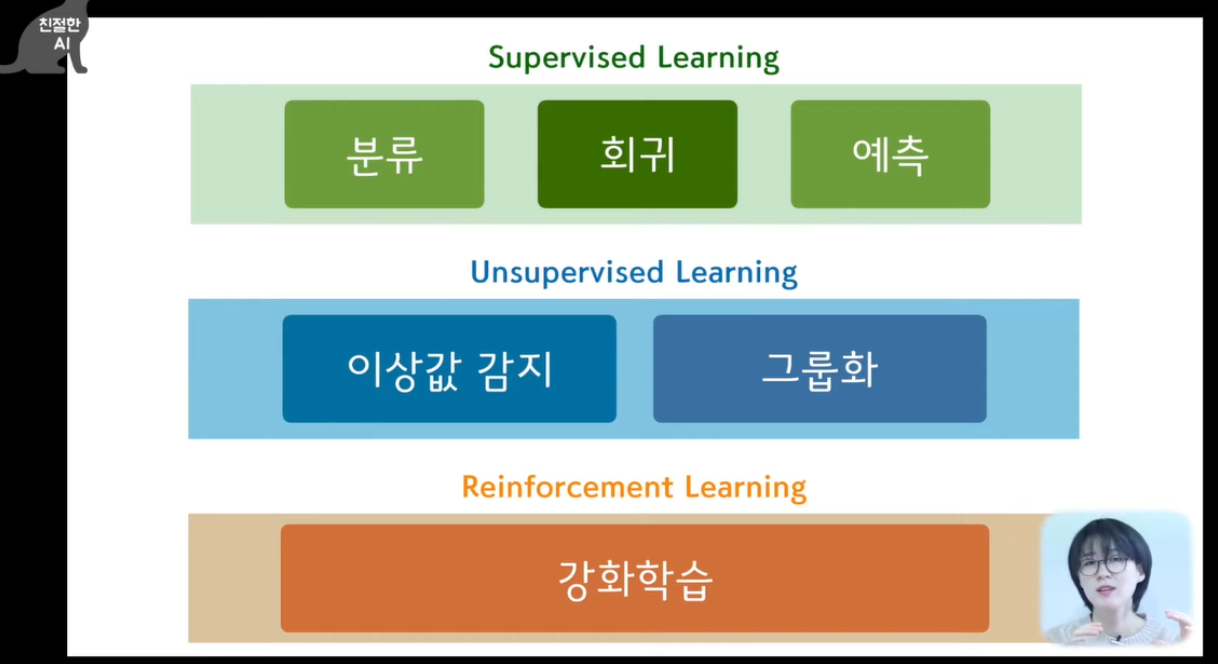

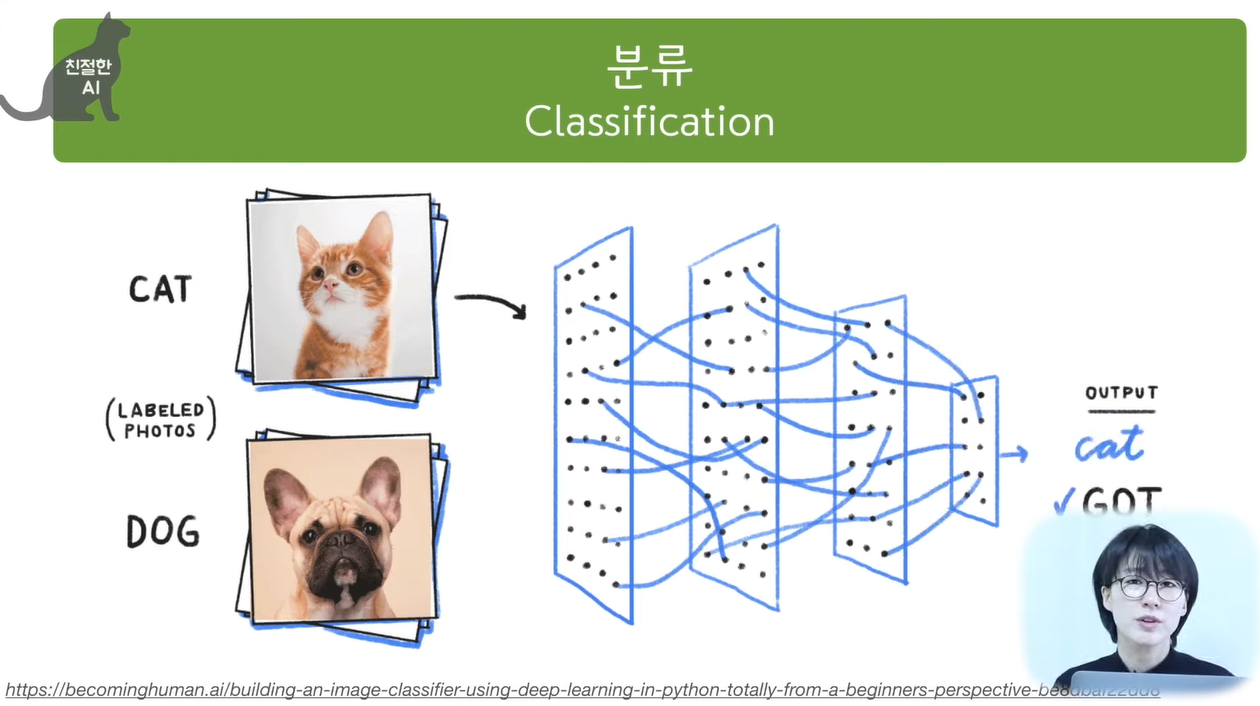

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

>Matplotlib 패키지 산점도 그리기

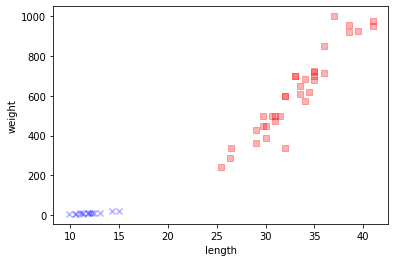

In [2]:
import matplotlib.pyplot as plt

# 마커와 컬러맵을 설정
labels = ['bream', 'smelt']
markers = ['s', 'x', 'o', '^', 'v']
colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']

plt.scatter(bream_length, bream_weight, c = colors[0], marker = markers[0], label = labels[0], alpha = 0.3)
plt.scatter(smelt_length, smelt_weight, c = colors[1], marker = markers[1], label = labels[1], alpha = 0.3)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

>사이킷런은 머신러닝 패키지이며, 2차원 리스트가 필요.

In [3]:
## 두 리스트 합치기(도미 + 빙어)            ex) [l1, l2, l3....]
length = bream_length + smelt_length                        

## 두 리스트 합치기(도미 + 빙어)            ex) [w1, w2, w3....]
weight = bream_weight + smelt_weight                        

## 사이킷런 2차원 리스트만 활용가능 / zip 함수로 나열된 리스트 각각 하나씩 원소꺼내 반환.       ex) [[l1,w1], [l2, w2], .... ]
fish_data = [[l, w] for l, w in zip(length, weight)]       

## fish target 답안만들기: 1 --> 도미 / 0 --> 빙어
fish_target = [1] * 35 + [0] * 14                                               
print("1) 사이킷런 패키지를 위한 2차원 리스트:", fish_data)

1) 사이킷런 패키지를 위한 2차원 리스트: [[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


2) Neighbors_정확도 =  1.0


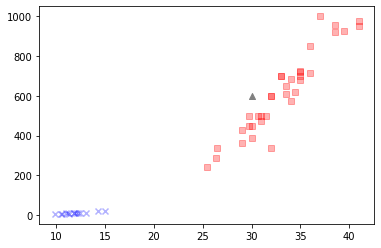

In [9]:
## 어떤 규칙을 찾기보다는, 전체 데이터를 메모리에 가지고 있음. / 단점: 데이터가 아주 많은 경우 사용하기 힘들다.
from sklearn.neighbors import KNeighborsClassifier                              

## k-최근접 알고리즘 클래스 객체 생성(Train X, 가장 가까운 데이터 참고: 기본값 n=5)
kn = KNeighborsClassifier()                                                     

## 훈련시키기.
kn.fit(fish_data, fish_target)                                                  

## 사이킷런 모델 평가하는 method
score = kn.score(fish_data, fish_target)                                        
print("2) Neighbors_정확도 = ", score)

plt.scatter(bream_length, bream_weight, c = colors[0], marker = markers[0], label = 'bream', alpha = 0.3)
plt.scatter(smelt_length, smelt_weight, c = colors[1], marker = markers[1], label = 'smelt', alpha = 0.3)                                      
plt.scatter(30, 600, c = colors[3], marker = markers[3])
plt.show()

>(30, 600) 물고기 예측 ==> predict method 2차원으로 데이터 전달

In [7]:
print("3) Test sample_구분 =", kn.predict([[30, 600]]))                         # 새로운 데이터를 받아 정답을 예측.

3) Test sample_구분 = [1]


>[참고 데이터를 49개로 모델링을 했을 경우]

In [10]:
kn49 = KNeighborsClassifier(n_neighbors=49)                                     # 참고 데이터 49개로 모델.
kn49.fit(fish_data, fish_target)                                                # 훈련시키기
print("4) n=49 data_Accuracy = ", kn49.score(fish_data, fish_target))           # 모델 평가
print("5) 35/49", 35/49)

4) n=49 data_Accuracy =  0.7142857142857143
5) 35/49 0.7142857142857143


>[100% 정확도 아래의 갖는 n개 찾기]

- KNeighborsClassifier 클래스 객체를 매번 다시 만들 필요없이,

- 해당 모델은 데이터를 저장하는 것이 전부이기에 이웃 개수를 변경 후 score() 메서드로 다시 계산

In [11]:
kn_opt = KNeighborsClassifier()                                                   
kn_opt.fit(fish_data, fish_target)

for n in range(5, 50):
  kn_opt.n_neighbors = n                                                        # 최근접 이웃 개수 설정.
  score = kn_opt.score(fish_data, fish_target)                                  # 점수계산
  if score < 1:                                                                 # 100% 정확도에 미치지 못하는 이웃 개수 출력
    print("최근접 이웃 =", n, "/", "accuracy =", score)
    break

최근접 이웃 = 18 / accuracy = 0.9795918367346939
